In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
# Function to load data from different file formats
def load_data(file_path):
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    else:
        pass
    
    return data

In [17]:
# Function to handle missing values
def handle_missing_values(data):
    columns_with_missing = data.columns[data.isnull().any()]
    data[columns_with_missing] = data[columns_with_missing].fillna(data[columns_with_missing].mean(numeric_only=True))
    
    return data

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

In [24]:
# Function to encode categorical features using label encoding
def encode_categorical_features(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    encoder = LabelEncoder()
    for column in categorical_columns:
        data[column] = encoder.fit_transform(data[column])
    
    return data

In [25]:
# Function to scale numerical features using StandardScaler
def scale_numerical_features(data):
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    
    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    
    return data

In [39]:
# Function to generate visualization dashboard
def generate_visualization_dashboard(data):
    # Generate histograms for numerical columns
    data.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 10))
    plt.show()
    
    # Generate box plots for numerical columns
    sns.boxplot(data=data.select_dtypes(include=[np.number]))
    plt.show()
    
    # Generate bar plots for categorical columns
    for column in data.select_dtypes(include=['object']):
        sns.countplot(data=data, x=column)
        plt.show()
    
 
        
    
 

In [40]:
# Main function to execute the EDA tool
def run_eda_tool(file_path):
    # Load the data
    data = load_data(file_path)
    
    if data is None:
        print("Failed to load the data. Please check the file path or data source.")
        return
    
    # Handle missing values
    data = handle_missing_values(data)
    
    # Encode categorical features
    data = encode_categorical_features(data)
    
    # Scale numerical features
    data = scale_numerical_features(data)
    
    # Generate visualization dashboard
    generate_visualization_dashboard(data)


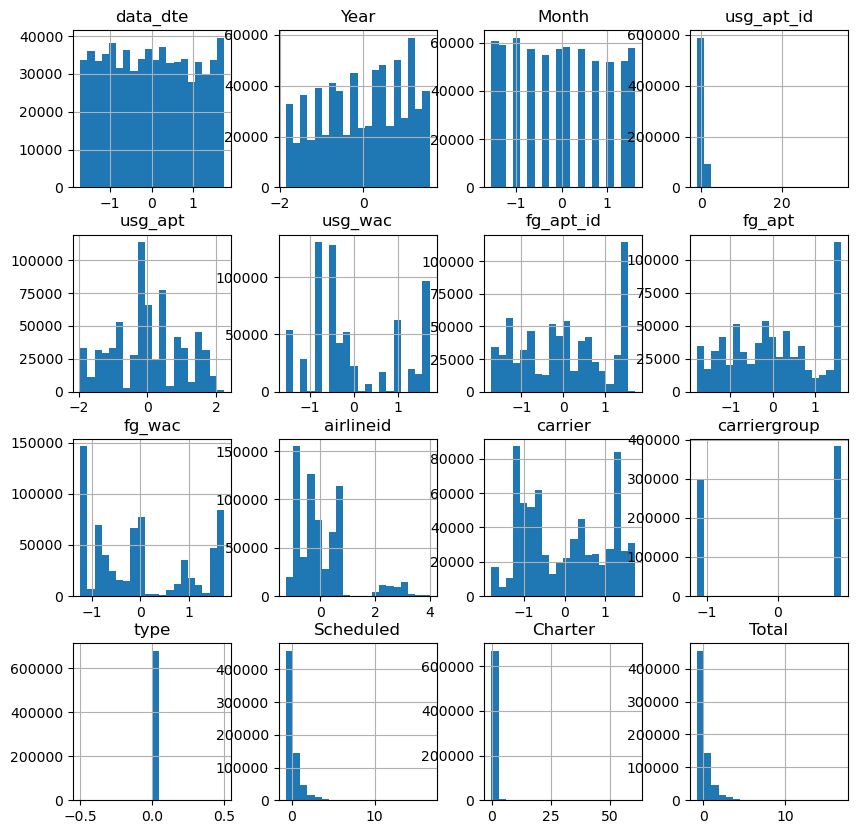

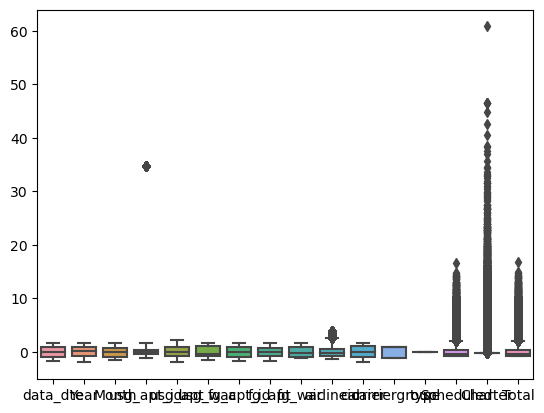

In [41]:
file_path = 'International_Report_Passengers.csv'
run_eda_tool(file_path)